In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,KFold
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
data=pd.read_csv('gas_turbines.csv')
data=data.iloc[:,[0,1,2,7]]
data

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72
...,...,...,...,...
15034,9.0301,1005.6,98.460,111.61
15035,7.8879,1005.9,99.093,111.78
15036,7.2647,1006.3,99.496,110.19
15037,7.0060,1006.8,99.008,110.74


In [ ]:
data['TEY']=data['TEY'].apply(lambda x:1 if x<150 else 0)

In [ ]:
data

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,1
1,6.7850,1008.4,97.118,1
2,6.8977,1008.8,95.939,1
3,7.0569,1009.2,95.249,1
4,7.3978,1009.7,95.150,1
...,...,...,...,...
15034,9.0301,1005.6,98.460,1
15035,7.8879,1005.9,99.093,1
15036,7.2647,1006.3,99.496,1
15037,7.0060,1006.8,99.008,1


In [ ]:
data.isnull().sum()

AT     0
AP     0
AH     0
TEY    0
dtype: int64

In [ ]:
data.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,0.811224
std,7.574323,6.41076,13.793439,0.391343
min,0.522300,985.85000,30.344000,0.000000
25%,11.408000,1008.90000,69.750000,1.000000
50%,18.186000,1012.80000,82.266000,1.000000
75%,23.862500,1016.90000,90.043500,1.000000
max,34.929000,1034.20000,100.200000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 470.1 KB


In [ ]:
corr=data.corr()
corr

,AT,AP,AH,TEY
AT,1.000000,-0.412953,-0.549432,0.302807
AP,-0.412953,1.000000,0.042573,-0.165185
AH,-0.549432,0.042573,1.000000,-0.004404
TEY,0.302807,-0.165185,-0.004404,1.000000


<Axes: >

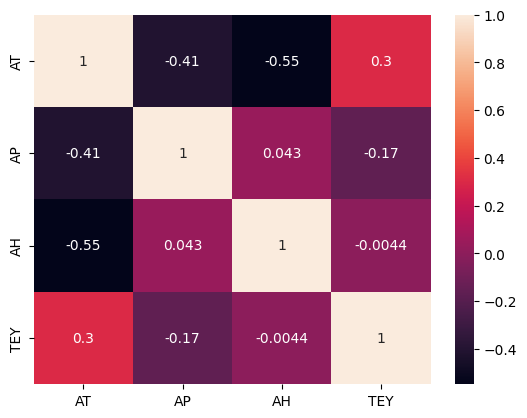

In [37]:
import seaborn as sns
sns.heatmap(corr,annot=True)

<Axes: xlabel='TEY', ylabel='count'>

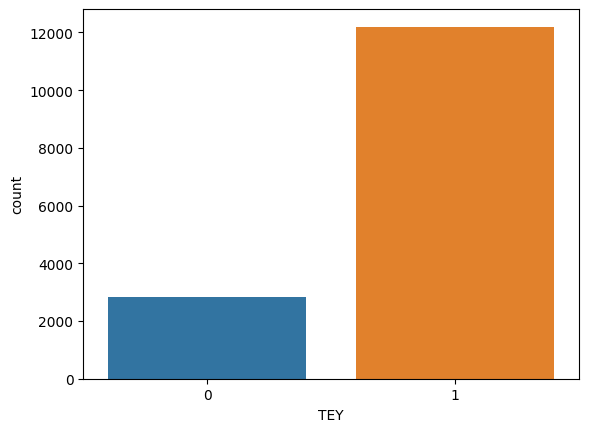

In [38]:
sns.countplot(x=data['TEY'])

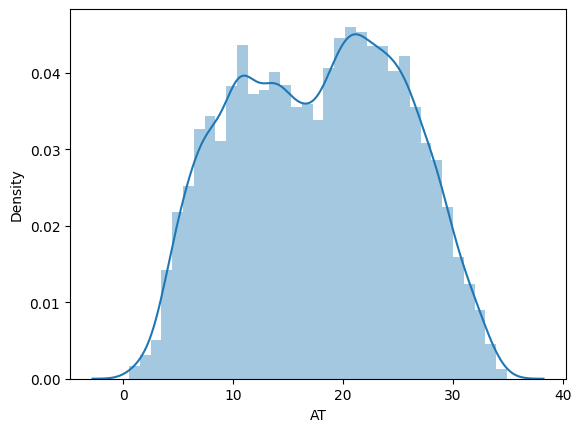

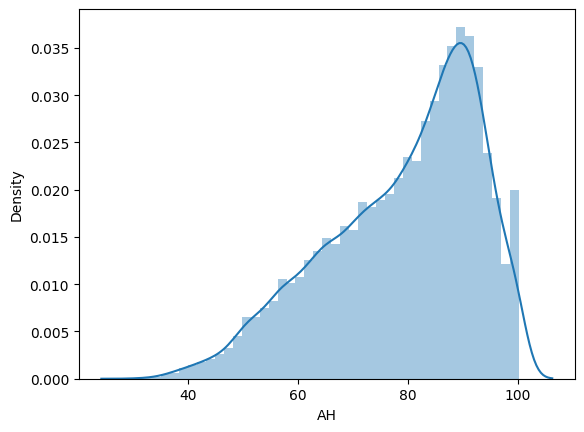

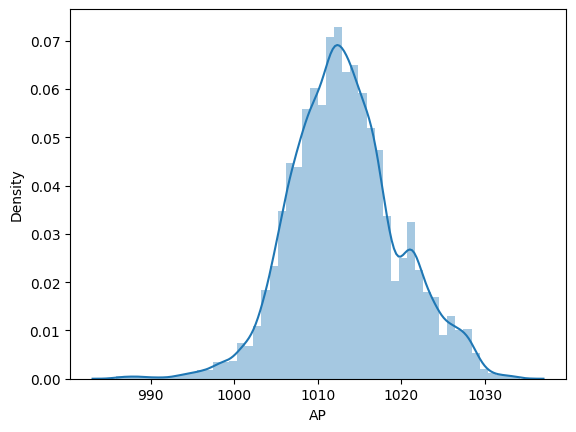

In [39]:
columns=['AT','AH','AP']
for i in columns:
  plt.show()
  sns.distplot(data[i])

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
scale=MinMaxScaler()
X_train=scale.fit_transform(x_train)
X_train

array([[0.35442806, 0.57187177, 0.79901512],
       [0.42918094, 0.71458118, 0.73015918],
       [0.40700503, 0.68562565, 0.80933635],
       ...,
       [0.46080269, 0.6008273 , 0.6530434 ],
       [0.5469487 , 0.50361944, 0.90739521],
       [0.27583872, 0.51602896, 0.84370705]])

In [ ]:
x_test=scale.fit_transform(x_test)
x_test

array([[0.41099349, 0.61605585, 0.37182719],
       [0.543179  , 0.53097731, 0.80334428],
       [0.31462279, 0.47207679, 0.7142564 ],
       ...,
       [0.6697985 , 0.41317627, 0.80183481],
       [0.31937284, 0.7447644 , 0.51924204],
       [0.5220806 , 0.48516579, 0.64677003]])

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer ='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  optmizer=RMSprop(0.03)
  model.compile(loss='mean_squared_error',metrics='accuracy',optimizer=optmizer)
  return model

In [36]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20]
epochs=[50,100,150,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.797 total time= 1.7min
[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.812 total time= 1.3min
[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.818 total time= 1.3min
[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.819 total time= 1.4min
[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.808 total time= 1.4min
[CV 1/5] END .........batch_size=10, epochs=100;, score=0.797 total time= 2.5min
[CV 2/5] END .........batch_size=10, epochs=100;, score=0.806 total time= 3.4min
[CV 3/5] END .........batch_size=10, epochs=100;, score=0.814 total time= 2.5min
[CV 4/5] END .........batch_size=10, epochs=100;, score=0.819 total time= 3.4min
[CV 5/5] END .........batch_size=10, epochs=100;, score=0.794 total time= 2.4min
[CV 1/5] END .........batch_size=10, epochs=150;, score=0.800 total time= 4.4min
[CV 2/5] END .........batch_size=10, epochs=150;,

In [40]:
print(result.best_score_,result.best_params_)

0.8150483743991266 {'batch_size': 10, 'epochs': 200}


In [ ]:
def create_model(dropout_rate,learning_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8,kernel_initializer = 'uniform',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=10,epochs=20,learning_rate=[0.001,0.01],dropout_rate=[0.1,0.3])
#dropout_rate=[0.1,0.3]
#learning_rate=[0.001,0.01]
param_grid=dict(dropout_rate=[0.1,0.3],learning_rate=[0.001,0.01])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.798 total time=  42.8s
[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.809 total time=  43.4s
[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.818 total time=  28.4s
[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.821 total time=  28.3s
[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.805 total time=  42.7s
[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.798 total time=  42.3s
[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.809 total time=  43.1s
[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.818 total time=  42.4s
[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.821 total time=  29.1s
[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.805 total time=  30.5s
[CV 1/5] END dropout_rate=0.3, learning_rate=0.001;, score=0.798 total time=  42.3s
[CV 2/5] END dropout_

In [ ]:
print(result.best_params_,result.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.8102035807657344


In [ ]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation=activation_Function))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation_Function=relu, init=zero;, score=0.202 total time= 1.2min
[CV 2/5] END activation_Function=relu, init=zero;, score=0.191 total time= 1.2min
[CV 3/5] END activation_Function=relu, init=zero;, score=0.182 total time= 1.4min
[CV 4/5] END activation_Function=relu, init=zero;, score=0.179 total time= 1.4min
[CV 5/5] END activation_Function=relu, init=zero;, score=0.195 total time= 1.4min
[CV 1/5] END activation_Function=relu, init=uniform;, score=0.798 total time= 1.2min
[CV 2/5] END activation_Function=relu, init=uniform;, score=0.809 total time= 1.4min
[CV 3/5] END activation_Function=relu, init=uniform;, score=0.818 total time= 1.4min
[CV 4/5] END activation_Function=relu, init=uniform;, score=0.821 total time= 1.4min
[CV 5/5] END activation_Function=relu, init=uniform;, score=0.805 total time= 1.2min
[CV 1/5] END activation_Function=relu, init=normal;, score=0.798 total time= 1.2min
[CV 2/5] END activat

In [26]:
print(result.best_params_,result.best_score_)

{'activation_Function': 'linear', 'init': 'normal'} 0.8123885832357726


In [29]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=3,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='uniform',activation='tanh'))
  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',metrics='accuracy',optimizer=adam)
  return model

In [30]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50)
model.fit(X_train,y_train)

Epoch 1/50
1053/1053 [==============================] - 6s 3ms/step - loss: 0.9417 - accuracy: 0.6273
Epoch 2/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4831 - accuracy: 0.8092
Epoch 3/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4650 - accuracy: 0.8088
Epoch 4/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4475 - accuracy: 0.8047
Epoch 5/50
1053/1053 [==============================] - 3s 3ms/step - loss: 0.4420 - accuracy: 0.8059
Epoch 6/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4407 - accuracy: 0.8054
Epoch 7/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4405 - accuracy: 0.8055
Epoch 8/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4368 - accuracy: 0.8054
Epoch 9/50
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4351 - accuracy: 0.8086
Epoch 10/50
1053/1053 [==============================] - 3s 2ms/step - loss: 0.436

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7a9f007acf70>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [31]:
y_pred_train=model.predict(X_train)

1053/1053 [==============================] - 2s 2ms/step


In [32]:
y_pred_test=model.predict(x_test)

452/452 [==============================] - 1s 1ms/step


In [33]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.43      0.14      0.21      1998
           1       0.83      0.96      0.89      8529

    accuracy                           0.80     10527
   macro avg       0.63      0.55      0.55     10527
weighted avg       0.75      0.80      0.76     10527



In [34]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.40      0.16      0.23       841
           1       0.83      0.95      0.88      3671

    accuracy                           0.80      4512
   macro avg       0.62      0.55      0.56      4512
weighted avg       0.75      0.80      0.76      4512

